# Linear Advection Equation in 2D

We now explore numerical solutions to the 2D linear advection equation

\begin{align}
  \frac{\partial u}{\partial t}
  + c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} 
  = 0
\end{align}

where $u = u(x,y,t)$ and $c$ is a constant.

To solve numerically, as before we use finite differences. However, we now have two spatial directions, and so we have two spatial indices to track spatial derivatives. 

First, discretize the independent variables: $x\rightarrow x_{i}$, $y\rightarrow y_{j}$, $t\rightarrow t_{n}$. 

Next, discretize the dependent variables (grid functions): $u(x,y,t)\rightarrow u(x_{i},y_{j},t_{n})\rightarrow u^{n}_{i,j}$. Finally, discretize derivatives according to some chosen finite difference scheme. As before we choose to use forward differencing for time derivatives and backward differencing for spatial derivatives:

\begin{align}
  &\frac{\partial u}{\partial t} \rightarrow \frac{u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta{t}}
  \\
  &\frac{\partial u}{\partial x} \rightarrow \frac{u^{n}_{i,j} - u^{n}_{i-1,j}}{\Delta{x}}
  \\
  &\frac{\partial u}{\partial y} \rightarrow \frac{u^{n}_{i,j} - u^{n}_{i,j-1}}{\Delta{y}}
\end{align}

where $\Delta{t}$ is the discrete time stepsize, and $\Delta{x}$ and $\Delta{y}$ are the discrete grid spacing in $x$ and $y$ directions, respectively. The above scheme leads to the discretized version of the linear advection equation in two dimensions

\begin{align}
  u^{n+1}_{i,j} = u^{n}_{i,j} 
  - \frac{c\Delta{t}}{\Delta{x}}\left(u^{n}_{i,j} - u^{n}_{i-1,j}\right)
  - \frac{c\Delta{t}}{\Delta{y}}\left(u^{n}_{i,j} - u^{n}_{i,j-1}\right).
\end{align}

Here we will use a uniform grid, meaning that the grid spacing in both directions are equal and furthermore that it is constant over the entire grid. Letting $h\equiv \Delta{x} = \Delta{y}$ simplifies the above expression to  

\begin{align}
  u^{n+1}_{i,j} = u^{n}_{i,j} 
  - \frac{c\Delta{t}}{h}\left(2 u^{n}_{i,j} - u^{n}_{i-1,j} - u^{n}_{i,j-1}\right)
\end{align}

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
# wave speed
c = 1.0
print('wave speed is',c)

# setup spatial grid (vertex-centered)
Lx = 2.0         # size of physical grid in x direction
Ly = 2.0         # size of physical grid in y direction
nx = 61         # total number of grid points in x direction
ny = 61         # total number of grid points in y direction
dx = Lx/(nx-1)   # grid spacing in x direction
dy = Ly/(ny-1)   # grid spacing in y direction
x = np.linspace(0, Lx, nx) # x grid
y = np.linspace(0, Ly, ny) # y grid
print('x grid spacing is',dx)
print('y grid spacing is',dy)

# setup time grid
sigma = 0.2
dt = sigma*dx   # size of timesteps
nt = 100        # total number of timesteps
print('time stepsize is',dt)

wave speed is 1.0
x grid spacing is 0.03333333333333333
y grid spacing is 0.03333333333333333
time stepsize is 0.006666666666666667


In [3]:
# initialize grid functions
u = np.zeros((nx,ny)) # grid function at the current step
un = np.ones((nx,ny)) # grid function at the previous step

# initial data
ax = int(0.25*Lx/dx)  #location of the first jump in x
ay = int(0.25*Ly/dy)  #location of the first jump in y
bx = int(0.50*Lx/dx)  #location of the second jump in x
by = int(0.50*Ly/dy)  #location of the second jump in y
u[  :  ,   :ay] = 1.  #lower strip
u[  :  , by:  ] = 1.  #upper strip
u[  :ax, ay:by] = 1.  #left block
u[bx:  , ay:by] = 1.  #right block
u[ax:bx, ay:by] = 2.  #central block
umax0 = np.amax(u)    #max value (for plotting)

<IPython.core.display.Javascript object>


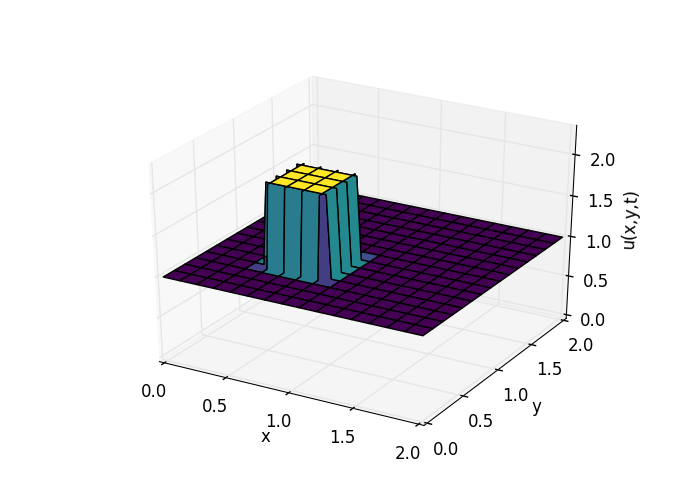

In [4]:
# plot initial configuration
fig = plt.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u[:], rstride=4, cstride=4, cmap='viridis')
ax.set_xlim(0, Lx)         #set x limits of plot
ax.set_ylim(0, Ly)         #set y limits of plot
ax.set_zlim(0, 1.15*umax0) #set z limits of plot
ax.set_xlabel('x')         #set x-axis label
ax.set_ylabel('y')         #set y-axis label
ax.set_zlabel('u(x,y,t)')  #set z-axis label
plt.show()                 #show plot

<IPython.core.display.Javascript object>


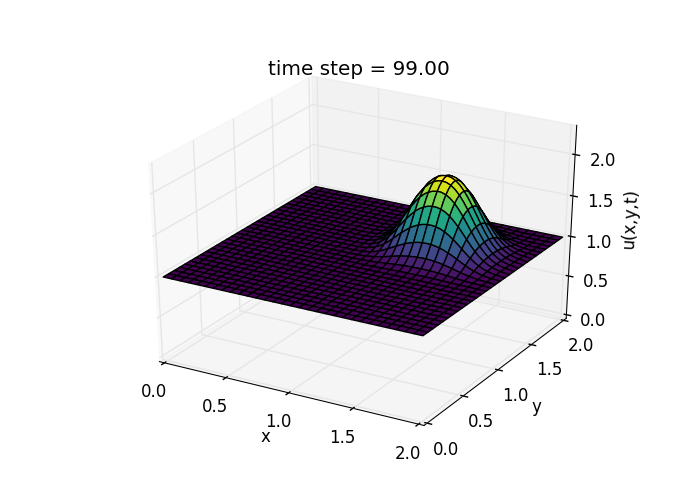

In [5]:
# function to update plot at each time step
def replot(n, X, Y, u, ax):
    ax.cla()                   #clear previous plot
    ax.set_xlim(0, Lx)          #set x limits of plot
    ax.set_ylim(0, Ly)          #set y limits of plot
    ax.set_zlim(0, 1.15*umax0) #set z limits of plot
    ax.set_xlabel('x')         #set x-axis label
    ax.set_ylabel('y')         #set y-axis label
    ax.set_zlabel('u(x,y,t)')  #set z-axis label
    ax.set_title('time step = %.2f' % n) #set title to be current timestep
    ax.plot_surface(X, Y, u[:], rstride=2, cstride=2, cmap='viridis') #plot u vs x,y
    fig.canvas.draw()          #redraw figure
    #time.sleep(0.01)           #pause

# create figure
fig = plt.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)

#plot initial configuration
replot(0, X, Y, u, ax)

# solve
for n in range(1,nt):
    # copy solution from previous time step
    un = u.copy()
    # update solution at interior points
    u[1:, 1:] = un[1:, 1:] \
    - c*dt/dx*(un[1:, 1:] - un[:-1, 1:]) \
    - c*dt/dy*(un[1:, 1:] - un[1:, :-1])
    # update solution at boundary points
    u[ 0,  :] = 1  #u at x=0
    u[-1,  :] = 1  #u at x=L
    u[ :,  0] = 1  #u at y=0
    u[ :, -1] = 1  #u at y=L

    # update plot
    replot(n, X, Y, u, ax)